In [ ]:
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv

 96% 53.0M/54.9M [00:03<00:00, 22.7MB/s]
100% 54.9M/54.9M [00:03<00:00, 14.9MB/s]
100% 15.8M/15.8M [00:01<00:00, 17.7MB/s]
100% 15.8M/15.8M [00:01<00:00, 9.60MB/s]
 98% 4.00M/4.09M [00:01<00:00, 3.74MB/s]
100% 4.09M/4.09M [00:01<00:00, 3.04MB/s]


In [ ]:
train_fname = './train.csv.zip'
test_fname = './test.csv.zip'
sub_fname = './sample_submission.csv.zip'

In [ ]:
import pandas as pd
df = pd.read_csv(train_fname)

In [ ]:
test_df = pd.read_csv(test_fname)

In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
df.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
df.question_text

0          How did Quebec nationalists see their province...
1          Do you have an adopted dog, how would you enco...
2          Why does velocity affect time? Does velocity a...
3          How did Otto von Guericke used the Magdeburg h...
4          Can I convert montra helicon D to a mountain b...
                                 ...                        
1306117    What other technical skills do you need as a c...
1306118    Does MS in ECE have good job prospects in USA ...
1306119                            Is foam insulation toxic?
1306120    How can one start a research project based on ...
1306121    Who wins in a battle between a Wolverine and a...
Name: question_text, Length: 1306122, dtype: object

In [ ]:
sample_size = 120_000
sample_df = df.sample(sample_size)
sample_df

,qid,question_text,target
807786,9e481005de251847412a,Should the opinions of white men not be counte...,0
739102,90c097f7810305ac8efb,What are the most reliable and complete busine...,0
643403,7e02c7996e1b7b7dabcb,Do every boy masturbate?,0
538857,698ee95c72acba65aee6,How can I find a carseat specialist in Atlanta?,0
235729,2e1dd4c9566b2951a47b,Which is the best selfie stick for smartphones?,0
...,...,...,...
336931,42045d4851225813e7bd,Why was the White Rose Movement important?,0
392507,4ce1df3ba8a2c766d9ea,Why should Hindu culture exist in the first pl...,1
929543,b62b23a30c834c21cc41,How do you clean a Taurus Tracker revolver?,0
284600,37b9a7244a4dd263e131,How many books should I read a year?,0


In [ ]:
sample_df.target.value_counts(normalize=True)

0    0.93875
1    0.06125
Name: target, dtype: float64

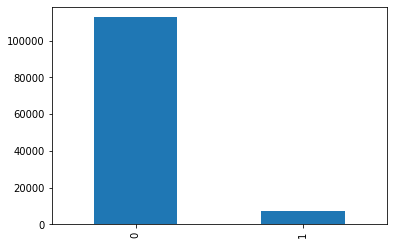

In [ ]:
sample_df.target.value_counts().plot(kind='bar')

## Now let's convert the given text into TF-IDF vectors

The reason we are using the TF-IDF instead of Bag of words is that TF-IDF can actually reduce or do not consider the most repeating words can they do not significantly affect the learning of the model

Firstly let's tokenize the given sentence into seperate words

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokenize('Hello. This is Aakkash!')

['Hello', '.', 'This', 'is', 'Aakkash', '!']

To apply the stemming, let's import the SnowballStemmer

Stemmer actually reduces the word to its least possible common prefix like Eating to eat, Walking to walk, etc

We can also use Lemmatization which will convert the given word to meaningful prefix

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem("Walking")

'walk'

Let's define a function that can implement both the stemming and tokenization

In [ ]:
def tokenize(word):
  return [stemmer.stem(w) for w in word_tokenize(word)]

In [ ]:
tokenize("HEllo. Aakkash is Eating")

['hello', '.', 'aakkash', 'is', 'eat']

Next step is to remove mostly occuring words which can be done by using stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_sw = stopwords.words('english')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = tokenize,stop_words = english_sw,max_features = 1200)

In [ ]:
sample_df.question_text

807786    Should the opinions of white men not be counte...
739102    What are the most reliable and complete busine...
643403                             Do every boy masturbate?
538857      How can I find a carseat specialist in Atlanta?
235729      Which is the best selfie stick for smartphones?
                                ...                        
336931           Why was the White Rose Movement important?
392507    Why should Hindu culture exist in the first pl...
929543          How do you clean a Taurus Tracker revolver?
284600                 How many books should I read a year?
162965    Conservatives had to endure 8 years of Obama, ...
Name: question_text, Length: 120000, dtype: object

Now let's fit in the sample dataframe into the vectorizer and get the corresponding inputs and targets

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 29.8 s, sys: 56.8 ms, total: 29.9 s
Wall time: 30.5 s


TfidfVectorizer(max_features=1200,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7faf2c748d30>)

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 38 s, sys: 92.8 ms, total: 38.1 s
Wall time: 42.5 s


In [ ]:
%%time
targets = sample_df.target

CPU times: user 67 µs, sys: 0 ns, total: 67 µs
Wall time: 70.6 µs


In [ ]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 38s, sys: 232 ms, total: 1min 38s
Wall time: 1min 41s


## Next step is to split the data for training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
ti,vi,tt,vt = train_test_split(inputs,targets,test_size=0.3)

In [ ]:
ti.shape

(84000, 1200)

In [ ]:
vi.shape

(36000, 1200)

## To work with PyTorch NN, we need to have the inputs in form of tensorts. So let's convert them

In [ ]:
ti

<84000x1200 sparse matrix of type '<class 'numpy.float64'>'
	with 479055 stored elements in Compressed Sparse Row format>

The training input is now a sparse array. We need to convert them into numpy arrays

In [ ]:
import torch
train_input_tensors = torch.tensor(ti.toarray()).float()
validation_input_tensors = torch.tensor(vi.toarray()).float()

In [ ]:
train_input_tensors.shape

torch.Size([84000, 1200])

In [ ]:
validation_input_tensors.shape

torch.Size([36000, 1200])

In [ ]:
tt

569492     1
375348     0
586944     1
546071     0
875468     0
          ..
401403     0
442491     0
363181     0
1245233    0
1060283    0
Name: target, Length: 84000, dtype: int64

The target seems to be a normal integer

In [ ]:
train_target_tensors = torch.tensor(tt.values).float()
validation_target_tensors = torch.tensor(vt.values).float()

In [ ]:
test_input_tensors = torch.tensor(test_inputs.toarray()).float()

## DataLoaders

Since PyTorch NN can work well with the DataLoaders, let's convert the input tensors into DataLoaders

In [ ]:
from torch.utils.data import TensorDataset,DataLoader

In [ ]:
train_ds = TensorDataset(train_input_tensors,train_target_tensors)

In [ ]:
val_ds = TensorDataset(validation_input_tensors,validation_target_tensors)

In [ ]:
test_ds = TensorDataset(test_input_tensors)

In [ ]:
train_dl = DataLoader(train_ds,batch_size = 256,shuffle=True)
val_dl = DataLoader(val_ds,batch_size = 256)
test_dl = DataLoader(test_ds,batch_size = 256)

In [ ]:
for batch in train_dl:
  bi = batch[0]
  bt = batch[1]
  print("Input Shape",bi.shape)
  print("Target shape",bt.shape)
  break

Input Shape torch.Size([256, 1200])
Target shape torch.Size([256])


## Training a Deep Learning Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1200,512)
    self.layer2 = nn.Linear(512,256)
    self.layer3 = nn.Linear(256,128)
    self.layer4 = nn.Linear(128,64)
    self.layer5 = nn.Linear(64,1)
  

  def forward(self,inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    out = F.relu(out)
    out = self.layer5(out)
    return out

In [ ]:
model = QuoraNet()

In [ ]:
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
for batch in train_dl:
  bi,bt = batch
  bo = model(bi)
  probs = torch.sigmoid(bo[:,0])
  preds = (probs>0.5).int()
  print(probs[:10])
  print(preds[:10])
  print(bt[:10])
  print(f1_score(preds,bt))
  print(accuracy_score(preds,bt))
  print(F.binary_cross_entropy(preds.float(),bt))
  break

tensor([0.5243, 0.5241, 0.5242, 0.5242, 0.5241, 0.5242, 0.5241, 0.5242, 0.5244,
        0.5243], grad_fn=<SliceBackward0>)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
0.08239700374531835
0.04296875
tensor(95.7031)


In [ ]:
def evaluate(model,dl):
  losses,accs,f1s = [],[],[]
  for batch in dl:
    inputs,targets = batch
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    loss = F.binary_cross_entropy(probs,targets,weight = torch.tensor(20))
    preds = (probs>0.5).int()

    acc = accuracy_score(targets,preds)
    f1 = f1_score(targets,preds)
    losses.append(loss.item())
    accs.append(acc)
    f1s.append(f1)
  return torch.mean(torch.tensor(losses)).item(),torch.mean(torch.tensor(accs)).item(),torch.mean(torch.tensor(f1s)).item()

In [ ]:
evaluate(model,train_dl)

(14.736336708068848, 0.0620844414893617, 0.11648585446976484)

In [ ]:
evaluate(model,val_dl)

(14.740578651428223, 0.059912455673758865, 0.11266132322889286)

In [ ]:
def fit(epochs,lr,model,train_dl,val_dl):
  history = []
  opt = torch.optim.Adam(model.parameters(),lr,weight_decay=1e-5)

  for epoch in range(epochs):
    for batch in train_dl:
      inputs,targets = batch

      outputs = model(inputs)

      probs = torch.sigmoid(outputs[:,0])

      loss = F.binary_cross_entropy(probs,targets,weight=torch.tensor(20) )

      loss.backward()
      opt.step()
      opt.zero_grad()
    loss,acc,f1 = evaluate(model,val_dl)
    print("Epoch: {};Loss: {:.4f};Accuracy: {:.4f};F1: {:.4f}".format(epoch+1,loss,acc,f1))
    history.append([loss,acc,f1])
  return history

In [ ]:
history = []
history.append(evaluate(model,val_dl))

In [ ]:
history

[(14.740578651428223, 0.059912455673758865, 0.11266132322889286)]

In [ ]:
history += fit(6,0.003,model,train_dl,val_dl)

Epoch: 1;Loss: 2.9905;Accuracy: 0.9461;F1: 0.3846
Epoch: 2;Loss: 2.9093;Accuracy: 0.9479;F1: 0.4107
Epoch: 3;Loss: 2.9789;Accuracy: 0.9476;F1: 0.4279
Epoch: 4;Loss: 3.6998;Accuracy: 0.9393;F1: 0.4472
Epoch: 5;Loss: 5.0191;Accuracy: 0.9440;F1: 0.3888
Epoch: 6;Loss: 6.0581;Accuracy: 0.9403;F1: 0.4392


In [ ]:
def predict(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensor = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensor)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs>0.5).int()
  return preds

In [ ]:
small_df = df.sample(20)
predict(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [ ]:
small_df.target

639483     0
1123946    0
839914     0
959888     0
886218     0
1276952    0
814099     0
187777     0
194551     0
1260137    0
872252     0
238129     0
40838      0
347754     0
681414     0
1230039    0
56661      0
150580     0
350521     1
79803      0
Name: target, dtype: int64

In [ ]:
type(predict(small_df).numpy())

numpy.ndarray

In [ ]:
type(small_df.target.to_numpy())

numpy.ndarray

In [ ]:
accuracy_score(predict(small_df).numpy(),small_df.target.to_numpy())

0.95

Now let's define a function that can accept a text as an input and can predict whether it's sincere or not

In [ ]:
def predict_text(text):
  df = pd.DataFrame({'question_text':[text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensor = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensor)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs>0.5).int()
  return preds

In [ ]:
predict_text("Why Black people are muscular?")

tensor([1], dtype=torch.int32)

In [ ]:
predict_text("Who is Jeff Bezos?")

tensor([0], dtype=torch.int32)

## Generating predictons for Test dataset

In [ ]:
test_inputs

<375806x1200 sparse matrix of type '<class 'numpy.float64'>'
	with 2143817 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
def make_preds(dl):
  all_preds = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs>0.5).int()
    all_preds.append(preds.detach().numpy())
  return np.concatenate(all_preds)

In [ ]:
test_preds = make_preds(test_dl)

In [ ]:
test_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
sample_df

,qid,question_text,target
807786,9e481005de251847412a,Should the opinions of white men not be counte...,0
739102,90c097f7810305ac8efb,What are the most reliable and complete busine...,0
643403,7e02c7996e1b7b7dabcb,Do every boy masturbate?,0
538857,698ee95c72acba65aee6,How can I find a carseat specialist in Atlanta?,0
235729,2e1dd4c9566b2951a47b,Which is the best selfie stick for smartphones?,0
...,...,...,...
336931,42045d4851225813e7bd,Why was the White Rose Movement important?,0
392507,4ce1df3ba8a2c766d9ea,Why should Hindu culture exist in the first pl...,1
929543,b62b23a30c834c21cc41,How do you clean a Taurus Tracker revolver?,0
284600,37b9a7244a4dd263e131,How many books should I read a year?,0


In [ ]:
predict_text(" Is Donald Trump afflicted with Münchausen syndrome by proxy (factitious disorder imposed on another)? Consider the President as the caregiver and the United States as the patient/victim")

tensor([1], dtype=torch.int32)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.to_csv('submission_using_dl.csv',index=None)